In [2]:
import pandas as pd

# Load the dataframe - make sure the file path is correct after uploading
df = pd.read_csv('/content/a04662ab156537051550.csv')

# Display the first few rows to confirm it loaded correctly
display(df.head())

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,9.3280,77.6247,318.0,1.1,1.0,2023-01-01,821,Aqua,MODIS,62,61.03,305.0,7.6,D,0
1,10.4797,77.9378,313.8,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,299.4,4.3,D,0
2,13.2478,77.2639,314.7,1.0,1.0,2023-01-01,822,Aqua,MODIS,55,61.03,302.4,4.9,D,0
3,12.2994,78.4085,314.3,1.0,1.0,2023-01-01,822,Aqua,MODIS,58,61.03,301.9,4.8,D,0
4,14.1723,75.5024,338.4,1.2,1.1,2023-01-01,823,Aqua,MODIS,88,61.03,305.3,41.5,D,0


In [26]:
# Remove duplicate rows
df = df.drop_duplicates()

# Drop rows with any missing values
df = df.dropna()


In [20]:
# Summary of numerical columns
print(df.describe())

# Count of records per day
print(df['acq_date'].value_counts())


           latitude     longitude    brightness          scan         track  \
count  78425.000000  78425.000000  78425.000000  78425.000000  78425.000000   
mean      23.150844     81.483673    322.108901      1.419616      1.152984   
std        5.050519      6.593400     12.865110      0.616605      0.198351   
min        8.159200     68.538400    300.000000      1.000000      1.000000   
25%       19.893900     75.915800    313.800000      1.000000      1.000000   
50%       23.272900     79.619100    320.700000      1.200000      1.100000   
75%       26.354000     85.176400    328.300000      1.500000      1.200000   
max       34.562000     97.104400    503.400000      4.800000      2.000000   

           acq_time    confidence       version    bright_t31           frp  \
count  78425.000000  78425.000000  7.842500e+04  78425.000000  78425.000000   
mean     826.035524     63.159337  6.103000e+01    302.439476     24.953765   
std      354.945590     17.917423  4.687480e-11    

In [21]:
# High confidence fires (confidence > 80)
high_confidence_fires = df[df['confidence'] > 80]
print(high_confidence_fires)


       latitude  longitude  brightness  scan  track    acq_date  acq_time  \
4       14.1723    75.5024       338.4   1.2    1.1  2023-01-01       823   
44      21.6428    82.6610       328.7   2.1    1.4  2023-01-01       824   
45      21.6437    82.6556       333.0   2.1    1.4  2023-01-01       824   
59      21.6406    82.6415       333.0   2.0    1.4  2023-01-01       824   
77      18.9994    77.5313       330.9   1.0    1.0  2023-01-01       824   
...         ...        ...         ...   ...    ...         ...       ...   
78293   16.5838    74.4947       313.5   1.3    1.1  2023-12-30      1635   
78314   17.5399    75.8291       313.8   1.1    1.0  2023-12-30      1635   
78315   17.1949    74.2071       313.2   1.4    1.2  2023-12-30      1635   
78335   20.5532    83.3746       325.2   1.2    1.1  2023-12-31       444   
78424   21.0679    72.8637       316.9   1.0    1.0  2023-12-31      2125   

      satellite instrument  confidence  version  bright_t31   frp daynight 

In [22]:
# Count by satellite
print(df['satellite'].value_counts())

# Average brightness per satellite
print(df.groupby('satellite')['brightness'].mean())


satellite
Aqua     53581
Terra    24844
Name: count, dtype: int64
satellite
Aqua     323.840619
Terra    318.374110
Name: brightness, dtype: float64


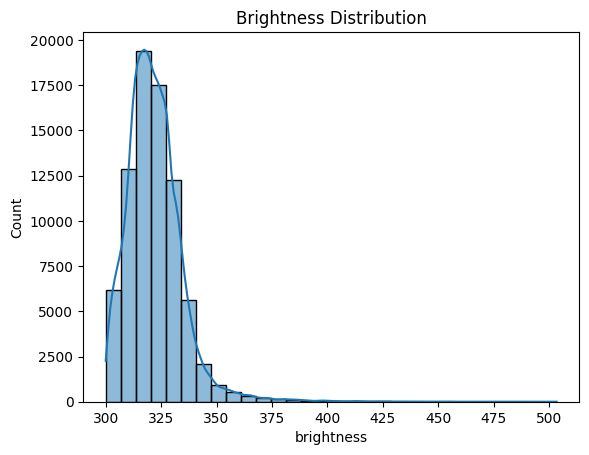

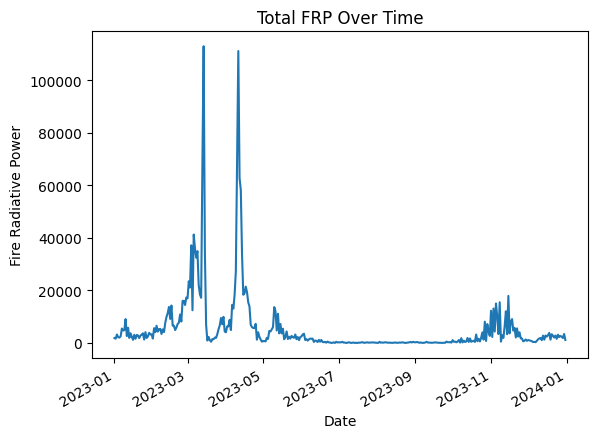

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Brightness distribution
sns.histplot(df['brightness'], bins=30, kde=True)
plt.title('Brightness Distribution')
plt.show()

# FRP over time
df['acq_date'] = pd.to_datetime(df['acq_date'])
df.groupby('acq_date')['frp'].sum().plot()
plt.title('Total FRP Over Time')
plt.ylabel('Fire Radiative Power')
plt.xlabel('Date')
plt.show()


In [25]:
# Save to Excel
df.to_excel("fires_cleaned.xlsx", index=False)

# Save to JSON
df.to_json("fires_cleaned.json", orient="records")
